# Morfosintactic Tagger Evaluation for Spanish

Redactar cada tarea y hacer un video presentandolo

Barajar corpus

Show accuracy with confidence intervals

10-fold cross validation

In [1]:
import nltk
from nltk.corpus import cess_esp
from nltk.tag import hmm, tnt, AffixTagger, UnigramTagger, BigramTagger, brill, brill_trainer, CRFTagger, perceptron
import pycrfsuite
import random
from random import shuffle
from math import sqrt
import matplotlib.pyplot as plt
import pyfreeling

ModuleNotFoundError: No module named 'pyfreeling'

In [2]:
def accuracy95(p, ndata):
    return 1.95 * sqrt(p*(1-p)/ndata)

def mean(data):
    return sum(data)/len(data)

In [3]:
# Load all sentences
corpus_all = list(cess_esp.tagged_sents())
number_sentences = len(corpus_all)

In [4]:
corpus_red = []

for sentece in corpus_all:
    new_sentence = []

    for word, label in sentece:
        if word != '*0*':
            if str.startswith(label, 'v') or str.startswith(label, 'F'):
                label = label[:3]
            else:
                label = label[:2]

            new_sentence.append((word, label))
    
    corpus_red.append(new_sentence)

In [5]:
# Shuffle
corpus_all_sf = list(corpus_all).copy()
corpus_red_sf = corpus_red.copy()
random.seed(21)
shuffle(corpus_all_sf)
random.seed(21)
shuffle(corpus_red_sf)

In [6]:
train_sent_len = int(number_sentences*0.9)

tr_all = corpus_all_sf[:train_sent_len]
te_all = corpus_all_sf[train_sent_len:]

tr_red = corpus_red_sf[:train_sent_len]
te_red = corpus_red_sf[train_sent_len:]


k = 10
partitionSize = int(number_sentences/k)

partitions_all = [corpus_all_sf[i*partitionSize:(i*partitionSize)+partitionSize] for i in range(k)]
partitions_red = [corpus_red_sf[i*partitionSize:(i*partitionSize)+partitionSize] for i in range(k)]

## Task 1
Use hmm with cess_esp with all and reduced categories, using cross-validation

In [15]:
tagger_hmm = hmm.HiddenMarkovModelTagger
acc_t1_HMM_all = []
acc_t1_HMM_red = []

In [16]:
for i in range(k):
    # All categories
    te_all_cv = partitions_all[i]
    tr_all_cv = partitions_all[:i] + partitions_all[i+1:]
    tr_all_cv = [val for sublist in tr_all_cv for val in sublist]
      
    tagger_hmm = tagger_hmm.train(tr_all_cv[0:-1])
    acc_t1_HMM_all.append(tagger_hmm.evaluate(te_all_cv))
    
    # Reduced categories
    te_red_cv = partitions_red[i]
    tr_red_cv = partitions_red[:i] + partitions_red[i+1:]
    tr_red_cv = [val for sublist in tr_red_cv for val in sublist]
      
    tagger_hmm = tagger_hmm.train(tr_red_cv[0:-1])
    acc_t1_HMM_red.append(tagger_hmm.evaluate(te_red_cv))

In [17]:
ic_t1_HMM_all = [accuracy95(p, partitionSize) for p in acc_t1_HMM_all]
ic_t1_HMM_red = [accuracy95(p, partitionSize) for p in acc_t1_HMM_red]

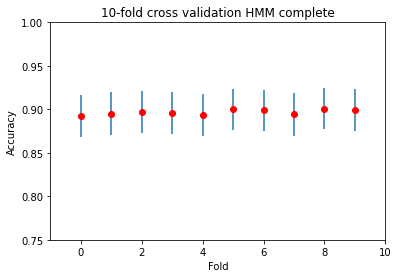

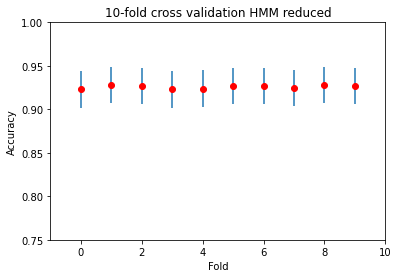

In [18]:
x = [i for i in range(10)]
graphRange = [-1, 10, 0.75, 1.0]

plt.title('10-fold cross validation HMM complete')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.axis(graphRange)
y = acc_t1_HMM_all
plt.plot(x, y,'or')
Tic = [accuracy95(p, number_sentences//k) for p in y]
plt.errorbar(x, y, yerr=Tic, linestyle='None')
plt.show()

plt.title('10-fold cross validation HMM reduced')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.axis(graphRange)
y = acc_t1_HMM_red
plt.plot(x, y,'or')
Tic = [accuracy95(p, number_sentences//k) for p in y]
plt.errorbar(x, y, yerr=Tic, linestyle='None')
plt.show()

In [54]:
print("Fold & Accuracy (\%) & CI 95\% (\%) \\\\ \\hline")
for i in range(k):
    m = acc_t1_HMM_all[i]
    ic = ic_t1_HMM_all[i]
    lowerCI = m-ic if m-ic > 0.0 else 0.0
    upperCI = m+ic if m+ic < 1.0 else 1.0
    print("{} & {:.2f} & [{:.2f}, {:.2f}] \\\\".format(i, m*100, lowerCI*100, upperCI*100))

Fold & Accuracy (\%) & IC 95\% (\%) \\ \hline
0 & 89.24 & [86.78, 91.70] \\
1 & 89.50 & [87.07, 91.94] \\
2 & 89.72 & [87.30, 92.13] \\
3 & 89.62 & [87.20, 92.04] \\
4 & 89.34 & [86.89, 91.79] \\
5 & 90.00 & [87.62, 92.38] \\
6 & 89.87 & [87.47, 92.27] \\
7 & 89.43 & [86.99, 91.87] \\
8 & 90.08 & [87.70, 92.45] \\
9 & 89.94 & [87.55, 92.33] \\


In [53]:
print("Fold & Accuracy (\%) & CI 95\% (\%) \\\\ \\hline")
for i in range(k):
    m = acc_t1_HMM_red[i]
    ic = ic_t1_HMM_red[i]
    lowerCI = m-ic if m-ic > 0.0 else 0.0
    upperCI = m+ic if m+ic < 1.0 else 1.0
    print("{} & {:.2f} & [{:.2f}, {:.2f}] \\\\".format(i, m*100, lowerCI*100, upperCI*100))

Fold & Accuracy (\%) & IC 95\% (\%) \\ \hline
0 & 92.29 & [90.18, 94.41] \\
1 & 92.83 & [90.79, 94.88] \\
2 & 92.64 & [90.57, 94.72] \\
3 & 92.32 & [90.21, 94.44] \\
4 & 92.36 & [90.25, 94.47] \\
5 & 92.64 & [90.56, 94.71] \\
6 & 92.72 & [90.65, 94.78] \\
7 & 92.48 & [90.39, 94.57] \\
8 & 92.81 & [90.76, 94.86] \\
9 & 92.73 & [90.66, 94.79] \\


In [52]:
sum(acc_t1_HMM_all)/len(acc_t1_HMM_all), sum(acc_t1_HMM_red)/len(acc_t1_HMM_red)

(0.89673227595514, 0.9258214956793254)

## Task 2
No cross-validation, use hmm and increase the training partition from 1/9 to 9/9

In [21]:
tagger_hmm = hmm.HiddenMarkovModelTagger
acc_t2_HMM_red = []

In [28]:
te_red = partitions_red[9]
                           
for i in range(k-1):
    # Reduced categories
    tr_red = partitions_red[:i+1]
    tr_red = [val for sublist in tr_red for val in sublist]
      
    tagger_hmm = tagger_hmm.train(tr_red[0:-1])
    acc_t2_HMM_red.append(tagger_hmm.evaluate(te_red))

In [29]:
ic_t2_HMM_red = [accuracy95(p, partitionSize) for p in acc_t2_HMM_red]

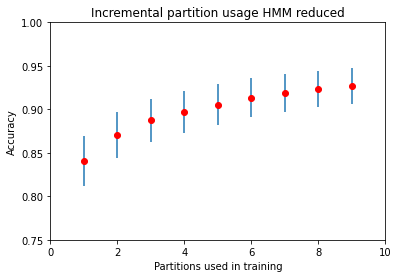

In [59]:
x = [i for i in range(1, 10)]
graphRange = [0, 10, 0.75, 1.0]

plt.title('Incremental partition usage HMM reduced')
plt.xlabel('Partitions used in training')
plt.ylabel('Accuracy')
plt.axis(graphRange)
y = acc_t2_HMM_red
plt.plot(x, y,'or')
Tic = [accuracy95(p, number_sentences//k) for p in y]
plt.errorbar(x, y, yerr=Tic, linestyle='None')
plt.show()

In [56]:
print("Partitions used in training & Accuracy (\%) & CI 95\% (\%) \\\\ \\hline")
for i in range(k-1):
    m = acc_t1_HMM_red[i]
    ic = ic_t1_HMM_red[i]
    lowerCI = m-ic if m-ic > 0.0 else 0.0
    upperCI = m+ic if m+ic < 1.0 else 1.0
    print("{} & {:.2f} & [{:.2f}, {:.2f}] \\\\".format(i, m*100, lowerCI*100, upperCI*100))

Partitions used in training & Accuracy (\%) & IC 95\% (\%) \\ \hline
0 & 92.29 & [90.18, 94.41] \\
1 & 92.83 & [90.79, 94.88] \\
2 & 92.64 & [90.57, 94.72] \\
3 & 92.32 & [90.21, 94.44] \\
4 & 92.36 & [90.25, 94.47] \\
5 & 92.64 & [90.56, 94.71] \\
6 & 92.72 & [90.65, 94.78] \\
7 & 92.48 & [90.39, 94.57] \\
8 & 92.81 & [90.76, 94.86] \\


## Task 3
Con tnt no incorpora suavizado para palabras desconocidas.

Usar método basado en sufijos de las palabras para construir un modelo para las palabras desconocidas (Affix Tagger)

En base al sufijo de la palabra desconocida se le asigna una categoría morfosintáctica

Estudiar la longitud de los sufijos en número de letras

Decidido el mejor sufijo incorporarlo como modelo de suavizado al etiquetador tnt y ver que pasa

In [40]:
tagger_hmm = hmm.HiddenMarkovModelTagger
acc_t3_TNT_red = []

In [41]:
for lenSuffix in range(0, 6):
    acc_aux = []
    for i in range(k):
        # All reduced
        te_red_cv = partitions_red[i]
        tr_red_cv = partitions_red[:i] + partitions_red[i+1:]
        tr_red_cv = [val for sublist in tr_red_cv for val in sublist]
    
        suffix_tagger = AffixTagger(tr_red_cv, affix_length=-lenSuffix)
        tagger_TNT = tnt.TnT(N=100, unk=suffix_tagger, Trained=True)
        tagger_TNT.train(tr_red_cv)
        acc_aux.append(tagger_TNT.evaluate(te_red_cv))
    
    mean_acc = sum(acc_aux)/len(acc_aux)
    acc_t3_TNT_red.append(mean_acc)

In [43]:
ic_t3_TNT_red = [accuracy95(p, partitionSize) for p in acc_t3_TNT_red]

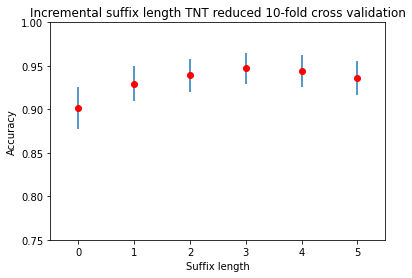

In [63]:
x = [i for i in range(len(acc_t3_TNT_red))]
graphRange = [-0.5, 5.5, 0.75, 1.0]

plt.title('Incremental suffix length TNT reduced 10-fold cross validation')
plt.xlabel('Suffix length')
plt.ylabel('Accuracy')
plt.axis(graphRange)
y = acc_t3_TNT_red
plt.plot(x, y,'or')
Tic = [accuracy95(p, number_sentences//k) for p in y]
plt.errorbar(x, y, yerr=Tic, linestyle='None')
plt.show()

In [66]:
print("Suffix Length & Accuracy (\%) & CI 95\% (\%) \\\\ \\hline")
for i in range(len(acc_t3_TNT_red)):
    m = acc_t3_TNT_red[i]
    ic = ic_t3_TNT_red[i]
    lowerCI = m-ic if m-ic > 0.0 else 0.0
    upperCI = m+ic if m+ic < 1.0 else 1.0
    print("{} & {:.2f} & [{:.2f}, {:.2f}] \\\\".format(i, m*100, lowerCI*100, upperCI*100))

Suffix Length & Accuracy (\%) & IC 95\% (\%) \\ \hline
0 & 90.16 & [87.80, 92.53] \\
1 & 92.96 & [90.92, 94.99] \\
2 & 93.91 & [92.01, 95.81] \\
3 & 94.70 & [92.93, 96.48] \\
4 & 94.42 & [92.60, 96.24] \\
5 & 93.57 & [91.62, 95.52] \\


## Task 4
Utilizar Brill, CRF y perceptron para compararlos con tnt y hmm para el conjunto reducido de etiquetadores

Brill - probar diferente etiquetadores iniciales (unigram o hmm tagger)

Puede ser hold-out o cross-validation dependiendo del tiempo

In [12]:
tagger_hmm = hmm.HiddenMarkovModelTagger
tagger_crf = CRFTagger()
tagger_per = perceptron.PerceptronTagger(load=False)

acc_t4_Brill_HMM_red = []
acc_t4_Brill_UG_red = []
acc_t4_CRF_red = []
acc_t4_PER_red = []

In [13]:
for i in range(k):
    # All reduced
    te_red_cv = partitions_red[i]
    tr_red_cv = partitions_red[:i] + partitions_red[i+1:]
    tr_red_cv = [val for sublist in tr_red_cv for val in sublist]
    
    # Brill HMM    
    brill.Template._cleartemplates()
    templates = brill.fntbl37()
    tagger_brill_HMM = brill_trainer.BrillTaggerTrainer(
                            initial_tagger=tagger_hmm.train(tr_red_cv),
                            templates=templates,
                            trace=3,
                            deterministic=True)
    tagger_brill_HMM = tagger_brill_HMM.train(tr_red_cv)    
    acc_t4_Brill_HMM_red.append(tagger_brill_HMM.evaluate(te_red_cv))
    
    # Brill Unigram    
    brill.Template._cleartemplates()
    templates = brill.fntbl37()
    tagger_brill_UG = brill_trainer.BrillTaggerTrainer(
                            initial_tagger=UnigramTagger(tr_red_cv),
                            templates=templates,
                            trace=3,
                            deterministic=True)
    tagger_brill_UG = tagger_brill_UG.train(tr_red_cv)    
    acc_t4_Brill_UG_red.append(tagger_brill_UG.evaluate(te_red_cv))
    
    # CRF
    tagger_crf.train(tr_red_cv, 'model.crf.tagger')
    acc_t4_CRF_red.append(tagger_crf.evaluate(te_red_cv))
    
    # Perceptron  
    tagger_per.train(tr_red_cv)
    acc_t4_PER_red.append(tagger_per.evaluate(te_red_cv))

TBL train (fast) (seqs: 5427; tokens: 170105; tpls: 37; min score: 2; min acc: None)
Finding initial useful rules...
    Found 128861 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  69  79  10   0  | sp->cs if Word:como@[0]
  34  59  25  49  | Fg->nc if Pos:Fg@[-1] & Pos:Fg@[1]
  32  33   1   0  | pr->cs if Word:que@[0] & Word:de@[-1]
  25  25   0   0  | nc->Fg if Word:-@[0]
  22  28   6   0  | cs->pr if Pos:sp@[1] & Word:que@[0] & Word:,@[-1]
  18  18   0   9  | da->aq if Word:del@[-1]
  17  17   0   8  | vmp->nc if Word:hay@[-2,-1]
  17  17   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
  16  16   0   0  | cs->pr if Word:que@[0] & 

   2   2   0   0  | cs->pr if Word:que@[0] & Word:el@[1] & Word:próximo@[2]
   2   2   0   0  | cs->pr if Word:que@[0] & Word:esta@[1] & Word:temporada@[2]
   2   2   0   0  | da->aq if Word:eventuales@[0] & Word:incidentes@[1] &
                  |   Word:que@[2]
   2   2   0   0  | nc->Z if Word:9,16@[0] & Word:de@[1] & Word:la@[2]
   2   2   0   0  | nc->np if Word:Comunidades@[0] & Word:con@[1] &
                  |   Word:otras@[2]
   2   2   0   0  | nc->np if Word:Fab_Five@[0] & Word:-@[1] & Word:,@[2]
   2   2   0   0  | p0->pp if Word:se@[0] & Word:conocían@[1] & Word:,@[2]
   2   2   0   0  | pr->Z if Word:80.206@[0] & Word:se@[1] &
                  |   Word:realizaron@[2]
   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rg->cc if Word:sin_embargo@[0] & Word:,@[1] & Word:el@[2]
   2   2   0   0  | rn->rg if Word:no@[0] & Word:hay@[1] & Word:sino@[2]
   2   2   0   0  | rn->vmi if Word:hago@[0] & Word:yo@[1] & Word:ahora@[2]
   2

   9   9   0   0  | vmp->nc if Pos:di@[-1]
   8   8   0   0  | pr->cs if Word:si@[1,2]
   8   8   0   0  | pi->di if Word:una@[0] & Pos:vmi@[1]
   8   8   0   0  | aq->nc if Word:público@[0] & Pos:sp@[-1]
   8   8   0   0  | vmi->nc if Word:una@[-1]
   8  13   5   0  | pr->cs if Pos:nc@[-1] & Pos:rg@[-2]
   8   8   0   0  | vmp->aq if Pos:rg@[-1] & Pos:nc@[-2]
   8  16   8   4  | di->pi if Pos:cc@[1]
   8   8   0   0  | aq->vmp if Pos:van@[-1]
   7  13   6   0  | nc->W if Word:año@[0] & Word:pasado@[1]
   7   7   0   0  | da->pp if Word:lo@[0] & Pos:vas@[1]
   7   7   0   0  | pp->rg if Word:sí@[0] & Pos:cc@[-1]
   7   7   0   0  | di->pi if Word:que@[1]
   7   7   0   3  | dn->pn if Word:,@[1]
   7   7   0   3  | dn->pn if Word:.@[1]
   7   7   0   0  | di->pi if Pos:vms@[1]
   7  13   6   3  | nc->vmi if Pos:pp@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   6   7   1   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
   6   9   3   0  | p0->pp if Word:se@[0] & 

  30  33   3   0  | pr->cs if Word:que@[0] & Word:de@[-1]
  27  27   0   0  | nc->Fg if Word:-@[0]
  23  28   5   0  | cs->pr if Pos:sp@[1] & Word:que@[0] & Word:,@[-1]
  20  20   0  10  | da->aq if Word:del@[-1]
  19  19   0   9  | vmp->nc if Word:hay@[-2,-1]
  19  19   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
  17  17   0   0  | cs->pr if Word:que@[0] & Word:al@[-1]
  16  28  12   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
  14  15   1   0  | nc->pn if Word:miles@[0] & Word:de@[1]
  13  26  13   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  12  12   0  26  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  12  16   4   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
  11  11   0   0  | rg->sp if Word:Hasta@[0]
  10  10   0   0  | p0->nc if Word:cuya@[-2,-1]
  10  15   5   0  | di->pi if Pos:sp@[1]
   9   9   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   9   9   0   0  | pr->cs if Word:cuando@[0] & Pos:nc@[-1]
   9   9   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   8   8   

   2   2   0   0  | cs->pr if Word:que@[0] & Word:los@[1] & Word:diferencia@[2]
   2   2   0   0  | cs->pr if Word:que@[0] & Word:se@[1] & Word:trate@[2]
   2   2   0   0  | cs->sp if Word:según@[0] & Word:él@[1] & Word:,@[2]
   2   2   0   0  | da->aq if Word:eventuales@[0] & Word:incidentes@[1] &
                  |   Word:que@[2]
   2   2   0   0  | da->pp if Word:los@[0] & Word:diferencia@[1] & Word:es@[2]
   2   2   0   0  | nc->Z if Word:9,16@[0] & Word:de@[1] & Word:la@[2]
   2   2   0   0  | nc->np if Word:Comunidades@[0] & Word:con@[1] &
                  |   Word:otras@[2]
   2   2   0   0  | nc->np if Word:Fab_Five@[0] & Word:-@[1] & Word:,@[2]
   2   2   0   0  | nc->pi if Word:uno@[0] & Word:de@[1] & Word:los@[2]
   2   2   0   0  | p0->pp if Word:se@[0] & Word:conocían@[1] & Word:,@[2]
   2   4   2   0  | pr->cs if Word:que@[0] & Word:en@[1] & Word:el@[2]
   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rn->rg if Word:no@[0] 

   7  13   6   0  | nc->W if Word:año@[0] & Word:pasado@[1]
   7   7   0   0  | aq->vmp if Word:haya@[-2,-1]
   7   7   0   0  | da->pp if Word:lo@[0] & Pos:vas@[1]
   7   7   0   0  | pi->di if Word:una@[0] & Pos:vmi@[1]
   7   7   0   0  | aq->nc if Word:público@[0] & Pos:sp@[-1]
   7   8   1   0  | pp->da if Word:la@[0] & Pos:sp@[-1]
   7   7   0   0  | rg->nc if Word:mañana@[0] & Pos:dd@[-1]
   7   7   0   3  | dn->pn if Word:,@[1]
   7   7   0   3  | dn->pn if Word:.@[1]
   7   7   0   0  | vmi->nc if Word:una@[-1]
   7   7   0   3  | di->pi if Pos:sp@[-1] & Pos:cc@[1]
   7   8   1   0  | vmi->nc if Pos:da@[-1] & Pos:sp@[-2]
   7   8   1   0  | di->pi if Pos:vsi@[1]
   7   9   2   3  | dn->pn if Pos:rg@[1]
   7   7   0   0  | aq->vmp if Pos:van@[-1]
   6   6   0   0  | aq->nc if Word:conductores@[0] & Word:los@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   6   6   0   0  | vsn->nc if Word:ser@[0] & Word:humano@[1]
   6   6   0   0  | aq->nc if Word:prof

  36  61  25  48  | Fg->nc if Pos:Fg@[-1] & Pos:Fg@[1]
  29  32   3   0  | pr->cs if Word:que@[0] & Word:de@[-1]
  25  25   0   0  | nc->Fg if Word:-@[0]
  25  30   5   0  | cs->pr if Pos:sp@[1] & Word:que@[0] & Word:,@[-1]
  22  22   0   9  | vmp->nc if Word:hay@[-2,-1]
  19  19   0  10  | da->aq if Word:del@[-1]
  16  16   0  23  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  15  15   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
  15  29  14   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
  14  14   0   0  | cs->pr if Word:que@[0] & Word:al@[-1]
  13  26  13   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  13  14   1   0  | pr->cs if Word:cuando@[0]
  12  29  17   6  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
  12  18   6   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
  10  10   0   0  | rg->sp if Word:Hasta@[0]
  10  10   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   9   9   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   9  13   4  23  | Fp->np if Word:-@[1,2]
   9   9   0   0  

   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rg->cc if Word:sin_embargo@[0] & Word:,@[1] & Word:el@[2]
   2   2   0   0  | rn->rg if Word:no@[0] & Word:hay@[1] & Word:sino@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->nc if Word:faltas@[0] & Word:los@[1] & Word:que@[2]
   2   2   0   0  | sp->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | Fpt->W if Word:Liga@[-1] & Word:1999-2000@[0] & Word:,@[1]
   2   2   0   0  | Fpt->aq if Word:francos@[-1] & Word:suizos@[0] &
                  |   Word:-Fpa-@[1]
   2   2   0   0  | Z-

   6   9   3   0  | cs->pr if Word:en@[-1] & Word:que@[0] & Word:se@[1]
   6   8   2   0  | cs->pr if Word:que@[0] & Word:con@[-1]
   6   7   1   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
  10  22  12   1  | di->pi if Pos:rg@[1]
   6  13   7   0  | nc->W if Word:año@[0] & Word:pasado@[1]
   6   6   0   0  | vsn->nc if Word:ser@[0] & Word:humano@[1]
   6   6   0   0  | da->pp if Word:lo@[0] & Pos:vas@[1]
   6   6   0   1  | pi->di if Word:una@[0] & Pos:nc@[1]
   6   6   0   0  | pp->rg if Word:sí@[0] & Pos:vmi@[1]
   6   7   1   0  | aq->nc if Word:estadounidense@[0] & Pos:da@[-1]
   6   6   0   0  | aq->rg if Word:igual@[0] & Pos:vmi@[-1]
   6   9   3   0  | aq->rg if Word:mejor@[0] & Pos:vmi@[-1]
   6   6   0   1  | pi->di if Word:un@[0]
   6   6   0   0  | di->pi if Word::@[1]
   6   6   0   0  | di->pi if Word:que@[1]
   6   6   0   3  | dn->pn if Word:,@[1]
   6   6   0   0  | aq->nc if Pos:sp@[-1] & Pos:rg@[1]
   6   6   0   0  | vmp->aq if Pos:rg@[-1] & Pos:vmi@[-2]
   6   6   

  17  28  11   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
  15  28  13   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  14  14   0   0  | cs->pr if Word:que@[0] & Word:al@[-1]
  13  28  15   6  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
  12  13   1   0  | pr->cs if Word:cuando@[0]
  11  12   1   0  | nc->pn if Word:miles@[0] & Word:de@[1]
  11  11   0   0  | rg->sp if Word:Hasta@[0]
  11  11   0  24  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  11  17   6   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
  10  14   4  22  | Fp->np if Word:-@[1,2]
  10  16   6   0  | di->pi if Word:una@[0] & Pos:sp@[1]
  10  10   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
   9   9   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   9   9   0   0  | p0->nc if Word:cuya@[-2,-1]
   8   8   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   8   8   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   7   7   0   0  | aq->pi if Word:mismo@[0] & Word:lo@[-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   

   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | vsi->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | Fpt->W if Word:Liga@[-1] & Word:1999-2000@[0] & Word:,@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:a@[0] & Word:-Fpt-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:este@[0] & Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:del@[-1] & Word:pasado@[0] & Word:,@[1]
   2   2   0   0  | aq->rg if Word:,@[-1] & Word:seguro@[0] & Word:que@[1]
   2   2   0   0  | cc->cs if Word:,@[-1] & Word:mientras_que@[0] & Word:en@[1]
   2   2   0   1  | cs->aq if Word:,@[-1] & Word:incluido@[0] & Word:el@[1]
   2   2   0   0  | cs->pr if Word:,@[-1] & Word:qu

   6   6   0   0  | pp->rg if Word:sí@[0] & Word:,@[-2]
   6   9   3   0  | aq->di if Word:cierto@[0] & Pos:nc@[1]
   6   6   0   0  | aq->nc if Word:n@[0] & Pos:nc@[-1]
   6   6   0   0  | pi->aq if Word:diferentes@[0]
   6   6   0   3  | dn->pn if Word:.@[1]
   6   6   0   0  | dn->pn if Word:que@[1]
   6   6   0   1  | dn->pn if Word:se@[1]
   6  11   5   0  | aq->nc if Pos:di@[-1] & Pos:aq@[1]
   6   6   0   0  | vmp->aq if Pos:rg@[-1] & Pos:vmi@[-2]
   6   6   0   0  | vmp->aq if Pos:np@[-1]
   6   8   2   0  | cs->pr if Pos:vmi@[1] & Word:que@[0] & Word:,@[-1]
   5   5   0   0  | aq->nc if Word:el@[-1] & Word:total@[0] & Word:de@[1]
   5   8   3   0  | cs->pr if Word:en@[-1] & Word:que@[0] & Word:se@[1]
   5   5   0   0  | aq->nc if Word:rojo@[0] & Word:al@[-1]
   5   5   0   0  | dd->pd if Word:tal@[0] & Word:como@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word::@[-1]
   5   6   1   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
  11  21  10   1  | di->pi if Pos:rg@[1]
   5 

  14  14   0  26  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  13  27  14   8  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
  12  12   0   0  | pr->cs if Word:cuando@[0] & Pos:nc@[-1]
  12  12   0   0  | rg->sp if Word:Hasta@[0]
  11  25  14   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  10  10   0   0  | p0->nc if Word:cuya@[-2,-1]
   9  15   6   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
   8   8   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   8  13   5   0  | di->pi if Word:una@[0] & Word:de@[1]
   8   8   0   7  | da->aq if Word:al@[-1]
   7   7   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   7   7   0   0  | pr->cs if Word:que@[0] & Word:desde@[-1]
   7   7   0   0  | pi->di if Word:sí@[-2,-1]
   7   7   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   7   7   0   0  | aq->pi if Word:mismo@[0] & Pos:da@[-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   7   0   0  | Zm->np if Pos:Fpa@[1] & Pos:np@[2]
   6   8   2   0  | p0->pp if Word:se@[0] & Word:lo@[1]


   2   2   0   0  | pr->Z if Word:80.206@[0] & Word:se@[1] &
                  |   Word:realizaron@[2]
   2   3   1   0  | pr->cs if Word:que@[0] & Word:en@[1] & Word:el@[2]
   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rg->cc if Word:sin_embargo@[0] & Word:,@[1] & Word:el@[2]
   2   2   0   0  | rn->rg if Word:no@[0] & Word:hay@[1] & Word:sino@[2]
   2   2   0   0  | rn->vmi if Word:hago@[0] & Word:yo@[1] & Word:ahora@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->nc if Word:faltas@[0] & Word:los@[1] & Word:que@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | vsi->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | Fpt->W if Word:

   6   8   2   0  | cs->pr if Word:que@[0] & Word:con@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   6   8   2   0  | p0->pp if Word:se@[0] & Word:lo@[1]
   6  10   4   0  | rn->rg if Word:no@[0] & Word:más_que@[2]
   6   6   0   0  | p0->pp if Word:sí@[1,2,3]
   6   6   0   1  | pi->di if Word:una@[0] & Pos:nc@[1]
   6   6   0   0  | aq->nc if Word:n@[0] & Pos:nc@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Pos:cs@[-1]
   6   8   2   0  | dn->Z if Word:millones@[1]
   6   6   0   0  | vmi->nc if Word:en@[-1]
   6  19  13   0  | aq->nc if Pos:sp@[-1] & Pos:cc@[1]
   6   6   0   0  | aq->nc if Pos:sp@[-1] & Pos:rg@[1]
   6   6   0   0  | pr->cs if Pos:nc@[-1] & Pos:Fe@[1]
   6   9   3   0  | pr->cs if Pos:np@[-1] & Pos:da@[1]
   6   6   0   0  | di->pi if Pos:vms@[1]
   5   5   0   0  | aq->nc if Word:el@[-1] & Word:total@[0] & Word:de@[1]
   5  12   7   0  | cc->rg if Word:,@[-1] & Word:sin_embargo@[0] & Word:,@[1]
   5   5   0   0  | dd->np if Word:Est

  19  19   0   6  | vmp->nc if Word:hay@[-2,-1]
  19  19   0  10  | da->aq if Word:del@[-1]
  16  16   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
  15  29  14   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
  15  30  15   6  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
  14  14   0   0  | cs->pr if Word:que@[0] & Word:al@[-1]
  13  13   0  14  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  12  17   5   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
  11  11   0   0  | pr->cs if Word:cuando@[0] & Pos:nc@[-1]
  11  16   5   0  | di->pi if Pos:sp@[1]
  10  10   0   0  | p0->nc if Word:cuya@[-2,-1]
  10  10   0   0  | rg->sp if Word:Hasta@[0]
  10  10   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   9  38  29   0  | pr->cs if Word:que@[0] & Pos:rg@[-2]
  10  10   0   0  | cs->pr if Word:que@[0] & Pos:da@[-1]
   9   9   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   8   8   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   8   8   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   8  12   4 

   2   2   0   0  | p0->pp if Word:se@[0] & Word:conocían@[1] & Word:,@[2]
   2   2   0   0  | pr->Z if Word:80.206@[0] & Word:se@[1] &
                  |   Word:realizaron@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | vsi->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | Fpt->aq if Word:francos@[-1] & Word:suizos@[0] &
                  |   Word:-Fpa-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:este@[0] & Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:candidato@[-1] & Word:opositor@[0] &
                  |   Word:,@[1]
   2   2   0   0  | aq->nc if Word:del@[-1] & Word:pasado@[0] & Word:,@[1]
   2   2   0   0  | aq->nc if Word:los@[-1

   6   6   0   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
   6   9   3   0  | p0->pp if Word:se@[0] & Word:lo@[1]
   6   6   0   0  | vmp->aq if Word:hay@[-2,-1]
   6   6   0   0  | p0->pp if Word:sí@[1,2,3]
   6   9   3   0  | aq->di if Word:cierto@[0] & Pos:nc@[1]
   6   6   0   0  | da->pp if Word:lo@[0] & Pos:vas@[1]
   6   6   0   0  | aq->nc if Word:n@[0] & Pos:nc@[-1]
   6   6   0   0  | cs->pr if Word:que@[0] & Pos:da@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Pos:cs@[-1]
   6   6   0   0  | pi->aq if Word:diferentes@[0]
   6   6   0   1  | dn->pn if Word:se@[1]
   6   6   0   0  | nc->vmp if Word:ha@[-1]
   6   8   2   0  | pr->cs if Pos:np@[-1] & Pos:da@[1]
   6   6   0   0  | di->pi if Pos:vms@[1]
   6   8   2   1  | dn->pn if Pos:rg@[1]
   6   6   0   0  | aq->vmp if Pos:vas@[-1]
   6  12   6   0  | vmp->aq if Pos:vmi@[-1]
   6   6   0   0  | vmp->nc if Pos:dd@[-1]
   6   8   2   0  | nc->W if Pos:da@[-1] & Word:año@[0] & Word:pasado@[1]
   5   5   0   0  | aq->nc i

  16  16   0   0  | cs->pr if Word:que@[0] & Word:al@[-1]
  16  26  10   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  15  15   0   0  | rg->pp if Word:sí@[0] & Pos:sp@[-1]
  13  13   0   0  | pr->cs if Word:cuando@[0] & Pos:nc@[-1]
  13  13   0  25  | Fp->vmi if Pos:Z@[1] & Pos:nc@[2]
  12  12   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
  11  11   0   0  | rg->sp if Word:Hasta@[0]
  11  16   5   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
  10  10   0   0  | p0->nc if Word:cuya@[-2,-1]
  10  16   6   0  | di->pi if Pos:sp@[1]
   9   9   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   9  23  14   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
   9  21  12   0  | pr->cs if Pos:aq@[-1] & Pos:rg@[-2]
   8   8   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   8  12   4  24  | Fp->np if Word:-@[1,2]
   7   7   0   0  | aq->pi if Word:mismo@[0] & Pos:da@[-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   7   0   6  | da->aq if Word:al@[-1]
   7   9   2   4  | vmi->

   2   2   0   0  | nc->rg if Word:tarde@[0] & Word:o@[1] & Word:temprano@[2]
   2   2   0   0  | p0->pp if Word:se@[0] & Word:conocían@[1] & Word:,@[2]
   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rg->cc if Word:sin_embargo@[0] & Word:,@[1] & Word:el@[2]
   2   2   0   0  | rn->vmi if Word:hago@[0] & Word:yo@[1] & Word:ahora@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->nc if Word:faltas@[0] & Word:los@[1] & Word:que@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | Fpt->W if Word:Liga@[-1] & Word:1999-2000@[0] & Word:,@[1]
   2   2   0   0  | Fpt->aq if Word:francos@[-1] & Word:suizos@[0] &
                  |   Word:-Fpa-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:a@[0] & Word:-Fpt-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:este@[0] & Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:los@[-1] & Wo

   6   6   0   0  | aq->nc if Word:n@[0] & Pos:nc@[-1]
   6   6   0   0  | aq->rg if Word:igual@[0] & Pos:vmi@[-1]
   6   6   0   0  | pr->cs if Word:que@[0] & Pos:cs@[-1]
   6   6   0   0  | di->pi if Word:que@[1]
   6   6   0   0  | dn->pn if Word:"@[1]
   6   6   0   2  | dn->pn if Word:se@[1]
   6   6   0   0  | aq->nc if Pos:da@[-1] & Pos:p0@[1]
   6   6   0   3  | di->pi if Pos:sp@[-1] & Pos:cc@[1]
   6   6   0   0  | vmp->aq if Pos:rg@[-1] & Pos:vmi@[-2]
   6   6   0   0  | aq->vmp if Pos:van@[-1]
   5   5   0   0  | dd->np if Word:Este@[0] & Word:el@[-1]
   5   5   0   0  | dd->pd if Word:tal@[0] & Word:como@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word::@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   5   6   1   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
   9  22  13   1  | di->pi if Pos:rg@[1]
   7   7   0   1  | pi->di if Word:un@[0]
   5   5   0   0  | cs->rg if Word:mientras@[0] & Word:que@[1]
   5  11   6   0  | nc->W if Word:año@[0] 

  11  11   0   0  | pr->cs if Word:cuando@[0] & Pos:nc@[-1]
  11  17   6   0  | di->pi if Pos:sp@[1]
  10  27  17   3  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
   9   9   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   9  13   4  25  | Fp->np if Word:-@[1,2]
   9   9   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   9   9   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   8   8   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   8  23  15   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
   8   8   0   7  | da->aq if Word:al@[-1]
   8   9   1   3  | vmi->np if Pos:nc@[-1] & Pos:Z@[1]
   7   7   0   0  | pr->cs if Word:que@[0] & Word:desde@[-1]
   7   7   0   0  | rg->pi if Word:nada@[0] & Pos:rn@[-2]
   7   7   0   0  | aq->pi if Word:mismo@[0] & Pos:da@[-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   7   0   0  | Zm->np if Pos:Fpa@[1] & Pos:np@[2]
   7   7   0   0  | di->pi if Pos:Fe@[1] & Pos:Fc@[2]
   7  12   5   3  | pr->cs if Pos:Fc@[-1] & Pos:rg@[-2]
   6   6   0 

   2   2   0   0  | pr->cs if Word:que@[0] & Word:no@[1] & Word:podemos@[2]
   2   2   0   0  | rg->cc if Word:sin_embargo@[0] & Word:,@[1] & Word:el@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->nc if Word:faltas@[0] & Word:los@[1] & Word:que@[2]
   2   2   0   0  | sp->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | Fpt->W if Word:Liga@[-1] & Word:1999-2000@[0] & Word:,@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:a@[0] & Word:-Fpt-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:este@[0] & Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:del@[-1] & Wo

   6   6   0   0  | rg->nc if Word:mañana@[0] & Pos:dd@[-1]
   6   6   0   3  | dn->pn if Word:.@[1]
   6   6   0   0  | vmp->aq if Pos:rg@[-1] & Pos:vmi@[-2]
   6   6   0   0  | di->pi if Pos:vms@[1]
   6   6   0   0  | vmp->aq if Pos:np@[-1]
   5   5   0   0  | aq->nc if Word:el@[-1] & Word:total@[0] & Word:de@[1]
   5   5   0   0  | aq->nc if Word:conductores@[0] & Word:los@[-1]
   5   5   0   0  | dd->np if Word:Este@[0] & Word:el@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:igual@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   5   5   0   0  | cs->rg if Word:mientras@[0] & Word:que@[1]
   5  12   7   0  | nc->W if Word:año@[0] & Word:pasado@[1]
   5   5   0   0  | aq->nc if Word:número@[0] & Pos:sp@[2]
   5   8   3   0  | aq->di if Word:cierto@[0] & Pos:nc@[1]
   5   5   0   0  | di->pi if Word:todo@[0] & Pos:rg@[1]
   5   5   0   0  | rg->nc if Word:mal@[0] & Pos:sp@[1]
   5   5   0   0  | aq->nc if Word:n@[0] & Pos:nc@[-1]
   5   5   0   0  |

  10  10   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
  10  16   6   0  | cs->pr if Pos:nc@[-1] & Word:que@[0] & Word:la@[1]
   9  11   2  20  | Fp->np if Word:-@[1,2]
   9   9   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   8   8   0   6  | da->aq if Word:al@[-1]
   8  26  18   1  | nc->aq if Pos:aq@[-1] & Pos:nc@[-2]
   7   7   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   7   7   0   0  | pi->di if Word:sí@[-2,-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   7   0   0  | Zm->np if Pos:Fpa@[1] & Pos:np@[2]
   6   6   0   0  | pr->cs if Word:que@[0] & Word:desde@[-1]
   6   6   0   0  | p0->nc if Word:cuyos@[-2,-1]
   6   6   0   0  | p0->pp if Word:sí@[1,2,3]
   6   7   1   0  | rg->pi if Word:nada@[0] & Pos:rn@[-2]
   6   6   0   0  | aq->pi if Word:mismo@[0] & Pos:da@[-1]
   6   7   1   0  | nc->vsn if Word:ser@[0] & Pos:sp@[-1]
   6   7   1   0  | dn->Z if Word:millones@[1]
   6   6   0   1  | p0->nc if Word:cuyo@[-1]
   6   6   0   0  | di->pi if Pos:Fe@[1] &

   2   2   0   0  | sp->nc if Word:número@[0] & Word:uno@[1] & Word:del@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | Fpt->aq if Word:francos@[-1] & Word:suizos@[0] &
                  |   Word:-Fpa-@[1]
   2   2   0   0  | Z->nc if Word:Con@[-1] & Word:fotografía@[0] &
                  |   Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:del@[-1] & Word:pasado@[0] & Word:,@[1]
   2   2   0   0  | aq->nc if Word:los@[-1] & Word:humanos@[0] & Word:,@[1]
   2   2   0   0  | aq->rg if Word:,@[-1] & Word:seguro@[0] & Word:que@[1]
   2   2   0   0  | cc->cs if Word:,@[-1] & Word:mientras_que@[0] & Word:en@[1]
   2   2   0   0  | cs->pr if Word:el@[-1] & Word:que@[0] & Word:se@[1]
   2   2   0   0  | cs->pr if Word:en@[-1] & Word:que@[0] & Word:fue@[1]
   2   2   0   0  | cs->pr if

   6   8   2   0  | pr->cs if Pos:np@[-1] & Pos:da@[1]
   6   6   0   0  | di->pi if Pos:Fe@[1] & Pos:Fc@[2]
   5   5   0   0  | aq->nc if Word:total@[0] & Word:del@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word::@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:periodistas@[-1]
   5   6   1   0  | rg->pi if Word:poco@[0] & Word:un@[-1]
  11  25  14   0  | di->pi if Pos:rg@[1]
   6   6   0   0  | pi->di if Word:un@[0] & Pos:rg@[1]
   5   5   0   0  | dd->np if Word:Este@[0] & Word:.@[1]
   5   5   0   0  | di->pi if Word:todo@[0] & Word:y@[1]
   5  11   6   0  | nc->W if Word:año@[0] & Word:pasado@[1]
   5   8   3   0  | p0->pp if Word:se@[0] & Word:lo@[1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:sus@[1]
   5  10   5   0  | rn->rg if Word:no@[0] & Word:más_que@[2]
   5   5   0   0  | pr->cs if Word:prensa@[-2,-1]
   5   5   0   0  | aq->nc if Word:número@[0] & Pos:sp@[2]
   5   5   0   0  | sp->cs if Word:según@[0] & Pos:vmi@[2]
   6   6   0   0  | pp->da if Word

   9   9   0   0  | pr->cs if Pos:aq@[-1] & Pos:vsi@[-2]
   8   8   0   0  | Z->nc if Word:fig.@[0] & Word:-Fpa-@[-1]
   8   8   0   0  | aq->nc if Word:general@[0] & Pos:np@[1]
   8   8   0   6  | da->aq if Word:al@[-1]
   7   7   0   0  | cs->pr if Word:que@[0] & Word:del@[-1]
   7  10   3   0  | rn->rg if Word:no@[0] & Word:más_que@[2]
   7   7   0   0  | nc->vsn if Word:ser@[0] & Pos:sp@[-1]
   7   7   0   0  | cs->aq if Word:está@[-1]
   7   7   0   0  | Zm->np if Pos:Fpa@[1] & Pos:np@[2]
   7   7   0   0  | pr->cs if Pos:sp@[-1] & Pos:vmi@[-2]
   7  10   3   0  | rg->pi if Pos:cs@[1] & Pos:vmn@[2] & Word:que@[1]
   6   6   0   1  | p0->nc if Word:cuyo@[-2,-1]
   6   6   0   0  | pi->di if Word:sí@[-2,-1]
   6   6   0   0  | p0->pp if Word:sí@[1,2,3]
   6  34  28   0  | pr->cs if Word:que@[0] & Pos:rg@[-2]
  10  10   0   0  | cs->pr if Word:que@[0] & Pos:da@[-1]
   6  10   4   0  | cs->pr if Word:que@[0] & Pos:pi@[-1]
   6   9   3   2  | vmi->np if Pos:nc@[-1] & Pos:Z@[1]
   6   6

   2   2   0   0  | rn->vmi if Word:hago@[0] & Word:yo@[1] & Word:ahora@[2]
   2   2   0   0  | sp->aq if Word:bajo@[0] & Word:grado@[1] & Word:de@[2]
   2   2   0   0  | sp->nc if Word:faltas@[0] & Word:los@[1] & Word:que@[2]
   2   2   0   0  | sp->vmn if Word:debatir@[0] & Word:la@[1] & Word:moción@[2]
   2   2   0   0  | vmi->vsi if Word:fueron@[0] & Word:a@[1] & Word:tiempo@[2]
   2   2   0   0  | vmn->Z if Word:480@[0] & Word:el@[1] & Word:número@[2]
   2   2   0   0  | vmn->nc if Word:inscripción@[0] & Word:una@[1] &
                  |   Word:hora@[2]
   2   2   0   0  | Fpt->W if Word:Liga@[-1] & Word:1999-2000@[0] & Word:,@[1]
   2   2   0   0  | Fpt->aq if Word:francos@[-1] & Word:suizos@[0] &
                  |   Word:-Fpa-@[1]
   2   2   0   0  | Z->nc if Word:-Fpa-@[-1] & Word:este@[0] & Word:-Fpt-@[1]
   2   2   0   0  | aq->nc if Word:del@[-1] & Word:pasado@[0] & Word:,@[1]
   2   2   0   0  | aq->nc if Word:los@[-1] & Word:humanos@[0] & Word:,@[1]
   2   2   0   0  | 

   6   6   0   0  | pi->aq if Word:diferentes@[0]
   6   6   0   1  | pi->di if Word:un@[0]
   6   6   0   0  | di->pi if Word::@[1]
   6   6   0   0  | vmi->nc if Word:una@[-1]
   6   9   3   0  | pr->cs if Pos:np@[-1] & Pos:da@[1]
   6   6   0   0  | di->pi if Pos:Fe@[1] & Pos:Fc@[2]
   6  10   4   0  | pr->cs if Pos:nc@[-1] & Pos:rg@[-2]
   6   6   0   0  | vmi->nc if Pos:da@[-1] & Pos:sp@[-2]
   6   6   0   0  | vmp->aq if Pos:rg@[-1] & Pos:vmi@[-2]
   6   8   2   0  | di->pi if Pos:vsi@[1]
   6   9   3   1  | pi->di if Pos:nc@[1]
   6   7   1   0  | cs->pr if Pos:pp@[1] & Word:que@[0] & Word:y@[-1]
   5   5   0   0  | aq->nc if Word:el@[-1] & Word:total@[0] & Word:de@[1]
   5   8   3   0  | cs->pr if Word:en@[-1] & Word:que@[0] & Word:se@[1]
   5   5   0   0  | dd->np if Word:Este@[0] & Word:el@[-1]
   5   5   0   0  | dd->pd if Word:tal@[0] & Word:como@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word::@[-1]
   5   5   0   0  | pr->cs if Word:que@[0] & Word:igual@[-1]
   5  

In [21]:
acc_t4_taggers = [0.9258, 0.9016, 0.9470,
                 mean(acc_t4_Brill_HMM_red),
                 mean(acc_t4_Brill_UG_red),
                 mean(acc_t4_CRF_red),
                 mean(acc_t4_PER_red)
                 ]

ic_t4_taggers = [accuracy95(p, partitionSize) for p in acc_t4_taggers]

In [22]:
ic_t4_taggers

[0.0208130868345397,
 0.023652685436504017,
 0.017790529721208256,
 0.020349464613276767,
 0.02386819458859449,
 0.016168269517862034,
 0.0067329209380137455]

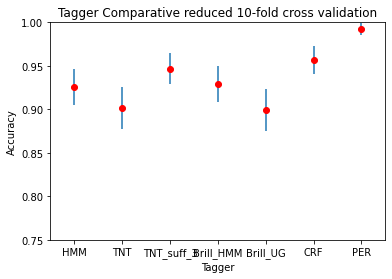

In [20]:
x = ["HMM", "TNT", "TNT_suff_3", "Brill_HMM", "Brill_UG", "CRF", "PER"]
graphRange = [-0.5, 6.5, 0.75, 1.0]

plt.title('Tagger Comparative reduced 10-fold cross validation')
plt.xlabel('Tagger')
plt.ylabel('Accuracy')
plt.axis(graphRange)
y = acc_t4_taggers
plt.plot(x, y,'or')
Tic = [accuracy95(p, number_sentences//k) for p in y]
plt.errorbar(x, y, yerr=Tic, linestyle='None')
plt.show()

In [23]:
print("Tagger & Accuracy (\%) & CI 95\% (\%) \\\\ \\hline")
for i in range(len(acc_t4_taggers)):
    m = acc_t4_taggers[i]
    ic = ic_t4_taggers[i]
    lowerCI = m-ic if m-ic > 0.0 else 0.0
    upperCI = m+ic if m+ic < 1.0 else 1.0
    print("{} & {:.2f} & [{:.2f}, {:.2f}] \\\\".format(x[i], m*100, lowerCI*100, upperCI*100))

Tagger & Accuracy (\%) & CI 95\% (\%) \\ \hline
HMM & 92.58 & [90.50, 94.66] \\
TNT & 90.16 & [87.79, 92.53] \\
TNT_suff_3 & 94.70 & [92.92, 96.48] \\
Brill_HMM & 92.93 & [90.90, 94.97] \\
Brill_UG & 89.96 & [87.57, 92.34] \\
CRF & 95.67 & [94.05, 97.28] \\
PER & 99.28 & [98.60, 99.95] \\


## Task 5

Realizar un etiquetado morfosintáctico del fichero Alicia.txt y entregar un fichero de texto: palabra/etiqueta